# Name : Moaaz Youssef 
# ID: 191036

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


In [2]:
os.chdir('D:\\nile\\Practical Data Science for Advanced Analytics and AI Applications\\Assignments\\Develop a Simple Model for Customer Churn Management')

In [3]:
telcom = pd.read_csv("Telecom-Usage-Details.csv")
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1.1. Data overview¶

In [4]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isna().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
telcom.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Data Manipulation

In [7]:
#Data Manipulation

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

# 3. Exploratory Data Analysis

# 3.1. Customer Churn in data

In [8]:
#labels
lab = telcom["Churn"].value_counts().keys().tolist()
#values
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer Churn in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

- percent of no churn is more than yes churn

# 3.2. Varibles distribution in customer Churn

In [9]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)

- percent of females whos have churn is more than male .

- percent of no senior citizen whos have churn is more than senior citizen and no churn is same ,It means that the number of no senior citizen is more than number of senior citizen in data set.

- percent of no partner whos have churn is the most and no churn is the the least.

- percent of no dependents whos have churn is the most  and no churn is same ,It means that the number of customers whos have dependents is more than number of no dependents.

- percent of phone servic is the most in churn and no churn is same ,It means that the phone services is the mostin data set records.

- percent of no multiple lines  is the most in no churn .

- percent of Fiber obtics is the most in churn .

- percent of no online security is the most in churn and no churn is same ,It means that the no online security is the most in data set records.

- percent of no online backup is the most in churn and no churn is same ,It means that the most of custmer don't have online backup .

- percent of no protect device is the most in churn and no churn is same ,It means that the most of custmer don't have device protection 

- percent of no TechSupport  is the most in churn and no churn is same ,It means that the most of custmer don't have  TechSupport .

- percent of no StreamingTV  is the most in churn and no churn is same ,It means that the most of custmer don't have StreamingTV  .

- percent of contract month to month  is the most in churn and no churn is same ,It means that the most of custmer use month to month .

- percent of PaperlessBilling is the most in churn and no churn is same ,It means that the most of custmer use PaperlessBilling. 

- percent of electric check payment is the most in churn.

- percent of tenur from 1 to 12 months is the mot in churn and when number of tenur is increasing the non churn is increasing i guess there is positive relationship .



# KMeans cluster

In [10]:
from sklearn.preprocessing import MinMaxScaler #for scaling data
from sklearn.cluster import KMeans

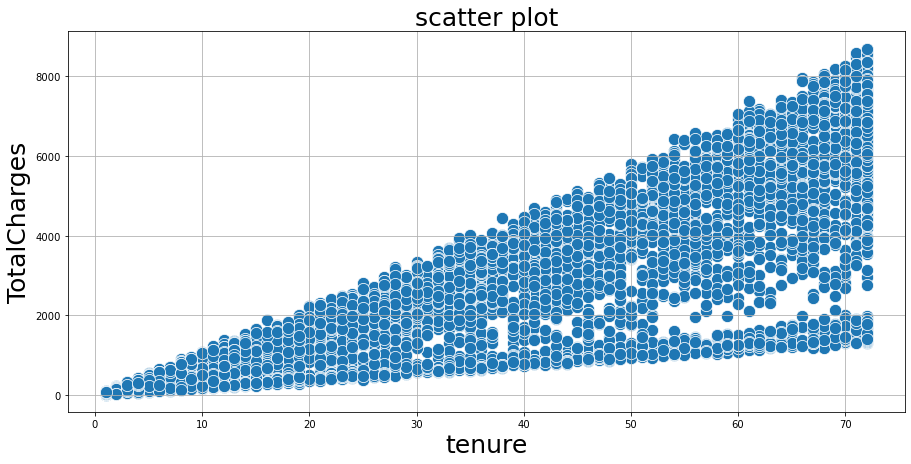

In [11]:
#plotting scatter for MonthlyCharges and tenure
plt.figure(figsize=(15,7))
sns.scatterplot(x="tenure", y="TotalCharges", data=telcom, palette='Paired', s=150)
plt.xlabel('tenure',fontsize=25)
plt.ylabel('TotalCharges',fontsize=25)
plt.title('scatter plot',fontsize=25)
plt.grid()
plt.show()

In [12]:
#slicing
df_TM=telcom[["tenure","TotalCharges"]]
df_TM.head(10)


,tenure,TotalCharges
0,1,29.85
1,34,1889.50
2,2,108.15
3,45,1840.75
4,2,151.65
5,8,820.50
6,22,1949.40
7,10,301.90
8,28,3046.05
9,62,3487.95


In [13]:
#Data Normalization and scaling
Mms=MinMaxScaler()
Mms.fit(df_TM)
df_TM_Transformed=Mms.transform(df_TM)
#Convert to data frame 
df_TM_Transformed=pd.DataFrame(df_TM_Transformed,columns=["tenure","TotalCharges"])
df_TM_Transformed

,tenure,TotalCharges
0,0.000000,0.001275
1,0.464789,0.215867
2,0.014085,0.010310
3,0.619718,0.210241
4,0.014085,0.015330
...,...,...
7027,0.323944,0.227521
7028,1.000000,0.847461
7029,0.140845,0.037809
7030,0.042254,0.033210


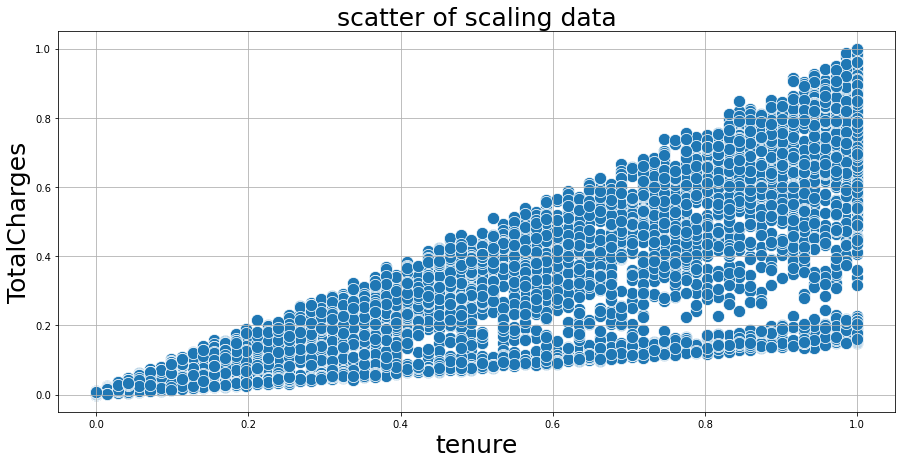

In [14]:
#Replotting 
plt.figure(figsize=(15,7))
sns.scatterplot(x="tenure", y="TotalCharges", data=df_TM_Transformed, palette='Paired', s=150)
plt.xlabel('tenure',fontsize=25)
plt.ylabel('TotalCharges',fontsize=25)
plt.title('scatter of scaling data',fontsize=25)
plt.grid()
plt.show()


In [15]:
#Elbow method to minimize within cluster sum of squre error to choose best K means ,Inertia method
sum_square_dis=[]
k=range(1,10)
for i in k :
    km=KMeans(n_clusters=i)
    km=km.fit(df_TM_Transformed)
    sum_square_dis.append(km.inertia_)

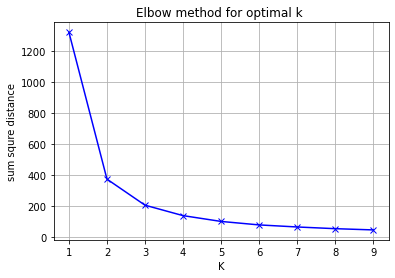

In [16]:
plt.plot(k,sum_square_dis,"bx-")
plt.xlabel("K")
plt.ylabel('sum squre distance')
plt.title("Elbow method for optimal k ")
plt.grid()
plt.show()

In [17]:
#chosse k =3 and fit the model
km3=KMeans(n_clusters=3)
km3.fit(df_TM_Transformed)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
#centroids of clusters 
centroids=km3.cluster_centers_
centroids=Mms.inverse_transform(centroids)
print(centroids)
df_centroids=pd.DataFrame(centroids,columns=["tenure centroid","TotalCharges centroid"])
df_centroids

[[  64.21005155 5896.14532861]
 [   9.94732143  565.645     ]
 [  44.77028302 2360.74714623]]


,tenure centroid,TotalCharges centroid
0,64.210052,5896.145329
1,9.947321,565.645000
2,44.770283,2360.747146


In [19]:
#append predictied cluster to it's record
telcom["cluster"]=km3.labels_
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,cluster
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12,1
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48,2
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48,2
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Tenure_12-24,1
7028,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Tenure_gt_60,0
7029,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Tenure_0-12,1
7030,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Tenure_0-12,1


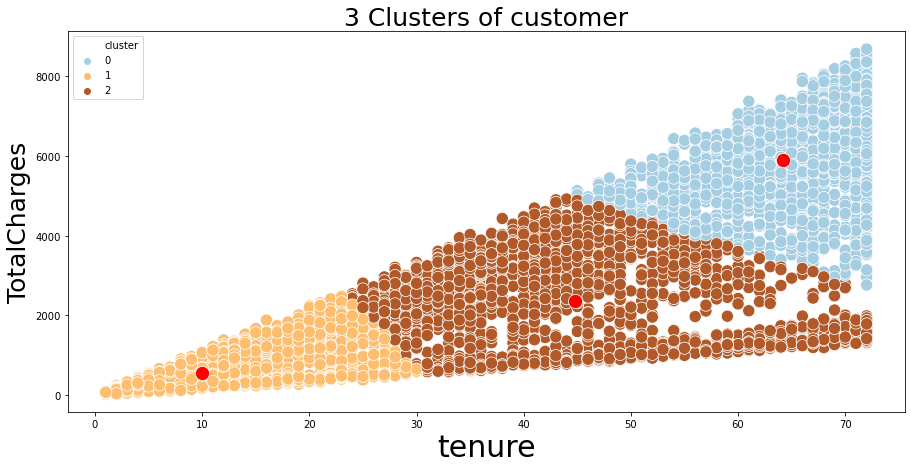

In [20]:
#visulize the data based on 3 clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x="tenure", y="TotalCharges", hue="cluster", data=telcom, palette='Paired', s=150)
sns.scatterplot(centroids[:,0] ,centroids[:,1], color='r',s = 200)
plt.xlabel('tenure',fontsize=30)
plt.ylabel('TotalCharges',fontsize=25)
plt.title('3 Clusters of customer',fontsize=25)

plt.legend(loc='upper left')
plt.show()

In [21]:
#slicing customer churn data
telcom_churn=telcom[telcom.Churn=="Yes"]
telcom_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,cluster
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12,1
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12,1
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Tenure_0-12,1
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Tenure_24-48,2
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Tenure_48-60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,1699-HPSBG,Male,No,No,No,12,Yes,No,DSL,No,...,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,Tenure_0-12,1
7015,8775-CEBBJ,Female,No,No,No,9,Yes,No,DSL,No,...,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,Tenure_0-12,1
7021,6894-LFHLY,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,Tenure_0-12,1
7023,0639-TSIQW,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,Tenure_gt_60,0


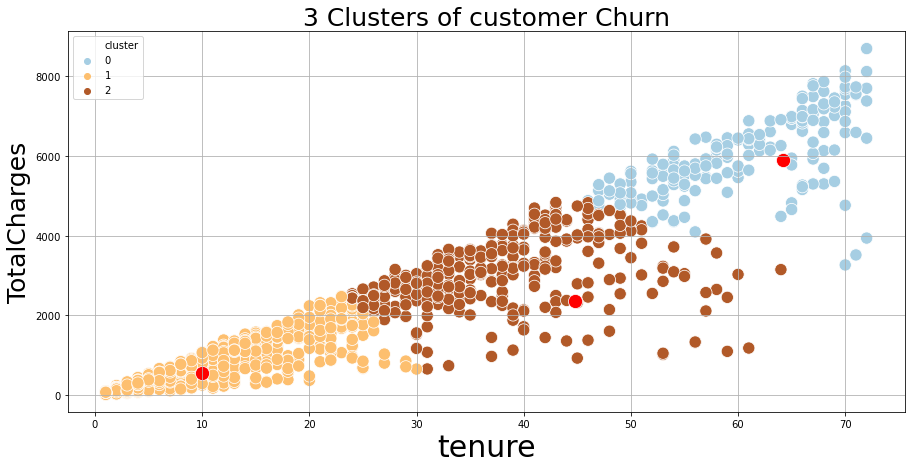

In [22]:
#visulize churn customer data based on 3 clusters 
plt.figure(figsize=(15,7))
sns.scatterplot(x="tenure", y="TotalCharges", hue="cluster", data=telcom_churn, palette='Paired', s=150,sizes=(200, 200))
sns.scatterplot(centroids[:,0] ,centroids[:,1], color='r',s = 200)
plt.xlabel('tenure',fontsize=30)
plt.ylabel('TotalCharges',fontsize=25)
plt.title('3 Clusters of customer Churn',fontsize=25)
plt.legend(loc='upper left')
plt.grid()
plt.show()

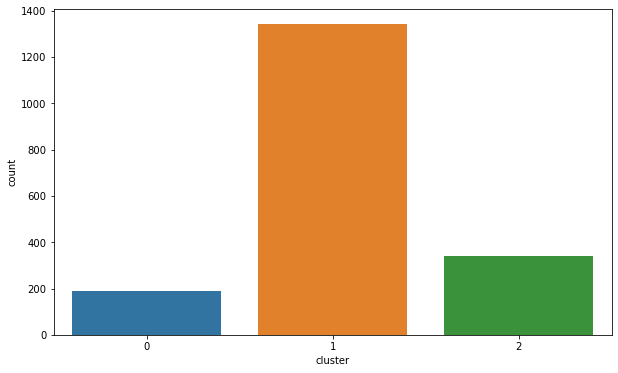

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x="cluster",data=telcom_churn)
plt.show()

In [24]:
# get which cluster has the most churn
telcom_churn.groupby("cluster").size()

cluster
0     188
1    1342
2     339
dtype: int64

In [25]:
#get min ranges 
telcom_churn[["tenure", "TotalCharges","cluster"]].groupby(['cluster'], as_index=False).min()

,cluster,tenure,TotalCharges
0,0,46,3264.45
1,1,1,18.85
2,2,24,658.95


In [26]:
#get max ranges  
telcom_churn[["tenure", "TotalCharges","cluster"]].groupby(['cluster'], as_index=False).max()

,cluster,tenure,TotalCharges
0,0,72,8684.80
1,1,30,2483.50
2,2,64,4830.25


- cluster one have the most of customer churn 1346 records from 1869 records , 72% of customer churn in cluster one.
- cluster one tenure range between (1 , 30) , Total charge between (18.85 , 2483.50).
- should focus on and take actions for customers in cluster one tenure and Total charges ranges .

In [27]:
# try to find if there difference between slicing customer churn first then clustering or no.
#slicing customer churn
telcom_churn=telcom[telcom.Churn=="Yes"]
telcom_churn.drop("cluster",axis=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Tenure_0-12
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Tenure_24-48
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Tenure_48-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,1699-HPSBG,Male,No,No,No,12,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,Tenure_0-12
7015,8775-CEBBJ,Female,No,No,No,9,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,Tenure_0-12
7021,6894-LFHLY,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,Tenure_0-12
7023,0639-TSIQW,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,Tenure_gt_60


In [28]:
df=telcom_churn[['tenure','TotalCharges']]
df_s=Mms.fit_transform(df)
df_sf=pd.DataFrame(df_s)
df_sf


,0,1
0,0.014085,0.010305
1,0.014085,0.015324
2,0.098592,0.092506
3,0.380282,0.349321
4,0.676056,0.578984
...,...,...
1864,0.154930,0.081809
1865,0.112676,0.044369
1866,0.000000,0.006566
1867,0.929577,0.792458


In [29]:
km=KMeans(n_clusters=3)
km.fit(df_sf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
c=km.cluster_centers_
c=Mms.inverse_transform(c)

In [31]:
c

array([[  56.42205323, 5423.87110266],
       [   5.44844929,  391.7969824 ],
       [  29.69491525, 2346.33171913]])

In [32]:
telcom_churn["cluster"]=km.labels_
telcom_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,cluster
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12,1
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12,1
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Tenure_0-12,1
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Tenure_24-48,2
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Tenure_48-60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,1699-HPSBG,Male,No,No,No,12,Yes,No,DSL,No,...,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,Tenure_0-12,1
7015,8775-CEBBJ,Female,No,No,No,9,Yes,No,DSL,No,...,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,Tenure_0-12,1
7021,6894-LFHLY,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,Tenure_0-12,1
7023,0639-TSIQW,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,Tenure_gt_60,0


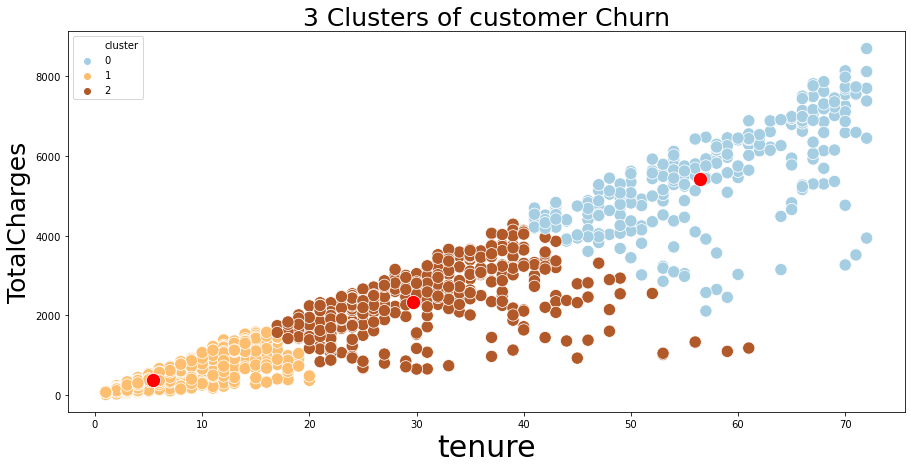

In [33]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="tenure", y="TotalCharges", hue="cluster", data=telcom_churn, palette='Paired', s=150,sizes=(200, 200))
sns.scatterplot(c[:,0] ,c[:,1], color='r',s = 200)
plt.xlabel('tenure',fontsize=30)
plt.ylabel('TotalCharges',fontsize=25)
plt.title('3 Clusters of customer Churn',fontsize=25)

plt.legend(loc='Down Right')
plt.show()

In [34]:
telcom_churn.groupby("cluster").size()

cluster
0     263
1    1193
2     413
dtype: int64

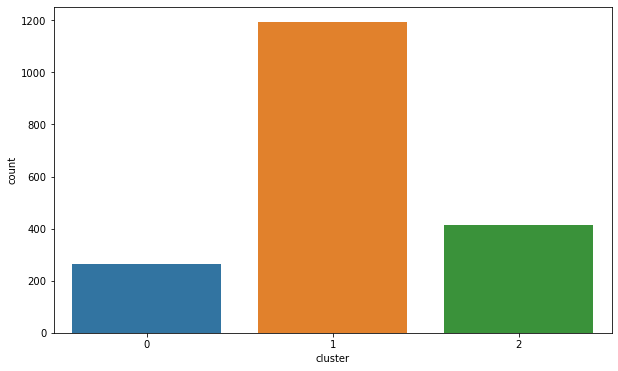

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x="cluster",data=telcom_churn)
plt.show()

- Still the most churn in the same cluster but then number of records is less than clustering at first then slicing .I don't have interpretaion for this.
- Dr tell me why that happend ,please. 

# Logistic regression

In [36]:
#Read the data as pandas dataframe
df= pd.read_csv("Telecom-Usage-Details.csv")

In [37]:
#check nulls 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
# data info to get information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [39]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [40]:
# Fill missing values with mean column values in the train set to fill TotalCharges .
df.fillna(df.mean(), inplace=True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
# drop customer ID it's not importan in prediction.
df.drop(["customerID"],axis=1,inplace=True)
#Conver the predictor variable in a binary numeric variable.
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
#Let's convert all the categorical variables into dummy variables one hot in code .
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [42]:
# separate the target variable.
Y=df_dummies["Churn"]
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [43]:
# sperate features 
X=df_dummies.drop(columns = ['Churn'])
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [44]:
# Scaling all the features to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
#take columns names.
features = X.columns.values
#scaling data in range 0 to 1 uniform distribution .
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
#conver scaled data to data frame 
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [45]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
# import from scikit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [47]:
#Model 1 
#split data into 70 train and 30 test .
#random state choose data randomly integer number means choosing same data every time  running the model.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.30, random_state=1)
#fit the model.
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)
#predict Y using x test .
prediction1=model1.predict(X_test1)
# calculating accuracy.



In [48]:
#Model 2
# change random state to choose randomly another data was choosen in first model .
# maybe there is same record choosen but not all same data.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.30, random_state=100)
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)
prediction2=model2.predict(X_test2)



In [49]:
#Model 3
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=0.30, random_state=200)
model3= LogisticRegression()
model3.fit(X_train3, y_train3)
prediction3=model3.predict(X_test3)



# Evaluation report 

In [50]:
print('Model 1 ')
print(classification_report(y_test1,prediction1))
print('Model 2')
print(classification_report(y_test2,prediction2))
print('model 3')
print(classification_report(y_test3,prediction3))

Model 1 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.63      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113

Model 2
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1547
           1       0.63      0.53      0.58       566

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113

model 3
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1530
           1       0.65      0.52      0.58       583

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      

## definition  of recall,F-score , accurcy and precision.

- Recall: Out of all the positive classes, how many instances were identified correctly.
- Recall(Sensitivity) or true positive rate= TP / (TP + FN)

- Precision: Out of all the predicted positive instances, how many were predicted correctly.
- Precision = TP / (TP + FP)

- F-Score: From Precision and Recall, F-Measure is computed and used as metrics sometimes. F – Measure the harmonic mean of     Precision and Recall.
- F-Score = (2 * Recall * Precision) / (Recall + Precision)

- Accuracy :Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to  - the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure - but only when you have symmetric datasets where values of false positive and false negatives are almost same. 
- Accuracy = TP+TN/TP+FP+FN+TN


# ROC curve 

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#Predict probabilities for the test data and Keep Probabilities of the positive class only.
y1_predicted_prob=model1.predict_proba(X_test1)[:,1]
#Compute the AUC Score Area under the curve.
auc1=roc_auc_score(y_test1,y1_predicted_prob)
#Get the ROC Curve.
#fpr=1-(Sensitivity) porportion of false positive predictied label.
#tpr=recall porportion of true positive predictied label
# thresholds from 0 to 1 .by default logistic regression threshould =0.5
#calculate fbr,tpr and thresholda.
fpr1,tpr1,thresholds1=roc_curve(y_test1,y1_predicted_prob)

#Model 2

y2_predicted_prob=model3.predict_proba(X_test2)[:,1]
auc2=roc_auc_score(y_test2,y2_predicted_prob)
fpr2,tpr2,thresholds2=roc_curve(y_test2,y2_predicted_prob)

#Model 3

y3_predicted_prob=model3.predict_proba(X_test3)[:,1]
auc3=roc_auc_score(y_test3,y3_predicted_prob)
fpr3,tpr3,thresholds3=roc_curve(y_test3,y3_predicted_prob)

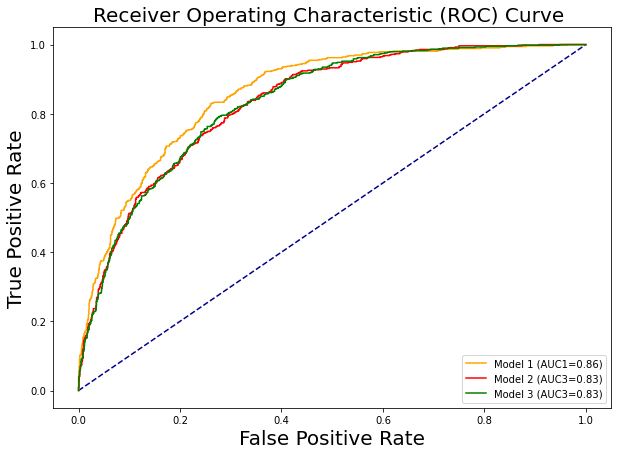

In [52]:
#plotting Roc 
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.plot(fpr1, tpr1,color="orange",label='Model 1 (AUC1=%.2f)' %auc1 )
plt.plot(fpr2, tpr2,color="red",label='Model 2 (AUC3=%.2f)' %auc2)
plt.plot(fpr3, tpr3, color="green",label='Model 3 (AUC3=%.2f)' %auc3)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristic (ROC) Curve ',fontsize=20)
plt.legend(loc='lower right')
plt.show();

- Model 1 AUC = 0.86 is more than others two model.
- it's mean that throw all threshoulds  it gives the most true positive rate  .
- area under curve or auc is a probability of true positive rate throw all threshould . when it increase false negative decrease it's the complement .
- the objective of roc curve to specifiy  how much false positive rate can accept and gives the most better true positive rate.
- the graph shows we can get the best true positive rate from model 1 at same point of false positive rate. 

## Naive bayes

In [53]:
df=pd.read_csv('Telecom-Usage-Details.csv')


In [54]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [56]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Features selection

In [58]:
#drop ID it't not a feature
df.drop('customerID',axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [59]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
c_v=df[['TotalCharges','TotalCharges','MonthlyCharges','tenure']]
cat=[]

for i in df.columns:
    if i not in c_v.columns:
        cat.append(i)
for i in cat :
    df[i]= pd.DataFrame(le.fit_transform(df[i]))

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int32
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int32
Dependents          7043 non-null int32
tenure              7043 non-null int64
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int32
InternetService     7043 non-null int32
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null int32
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null int32
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int32
dtypes: float64(1), int32(16), int64(2), object(1)
memory usage: 660.4+ KB


In [60]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [61]:
# Fill missing values with mean column values in the train set to fill TotalCharges .
df.fillna(df.mean(), inplace=True)
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [62]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [63]:
y=df["Churn"]
x = df.drop(columns='Churn')
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


# Univariate feature selection using chi2

In [64]:
from sklearn.feature_selection import chi2,SelectKBest
select_features=SelectKBest(chi2,k=3).fit(x,y)
#select score of each feature importance given label 
selected_features_df=pd.DataFrame({'features':list(x.columns),'scores':select_features.scores_})
#sort importance of features descending .
selected_features_df.sort_values(by='scores',ascending=False)

,features,scores
18,TotalCharges,629275.029414
4,tenure,16278.923685
17,MonthlyCharges,3680.787699
14,Contract,1115.780167
8,OnlineSecurity,551.611529
11,TechSupport,523.303866
9,OnlineBackup,230.086520
10,DeviceProtection,191.303140
1,SeniorCitizen,134.351545
3,Dependents,133.036443


- best 3 categorical features are Contract,OnlineSecurity and TechSupport

# Implement multinomial naive for categorical variables with cross validation

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#spliting data to best 3 features and target.
x=df[["Contract",'OnlineSecurity','TechSupport','Churn']]
y=df["Churn"]
NB=MultinomialNB()
#test 5 folds using accuracy.
result=cross_validate(NB, x, y, cv=5,scoring=('accuracy'))
print(result,'\n')
#get mean from 5 accuracy test result.
mean_accuracy=cross_val_score(NB, x, y, cv=5,scoring=('accuracy')).mean()
print('mean accuracy=',mean_accuracy)
y_predicted=cross_val_predict(NB,x,y,cv=5)

{'fit_time': array([0.00299954, 0.0019989 , 0.0039978 , 0.00399566, 0.00199962]), 'score_time': array([0.0019989 , 0.00199699, 0.00200033, 0.00099969, 0.0010004 ]), 'test_score': array([1., 1., 1., 1., 1.])} 

mean accuracy= 1.0


# Compare between best logistic model and Naive multinomial 

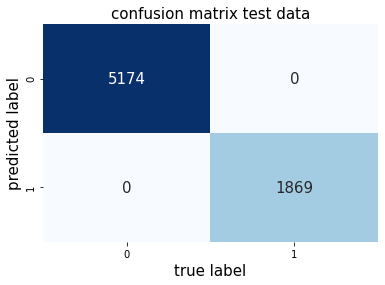

In [67]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predicted, y)
plt.title("confusion matrix test data",fontsize=15)
sns.heatmap(cm, annot=True, fmt='d',annot_kws={'size':15},square=False,cmap='Blues',cbar=False)
plt.xlabel('true label',fontsize=15)
plt.ylabel('predicted label',fontsize=15)
plt.show()

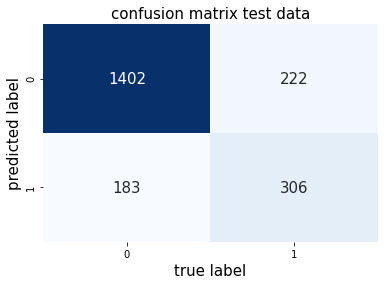

In [68]:
cm=confusion_matrix(prediction1, y_test1)
plt.title("confusion matrix test data",fontsize=15)
sns.heatmap(cm, annot=True, fmt='d',annot_kws={'size':15},square=False,cmap='Blues',cbar=False)
plt.xlabel('true label',fontsize=15)
plt.ylabel('predicted label',fontsize=15)
plt.show()

- Multinominal naive bayes is 100% accurate 

# Receiver Operating Characteristic (ROC) Curve 

- To plot roc curve must fit the multinominal model 

# Build model with 30 test and 70 train

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)
#fit the model.
NB.fit(X_train, y_train)
y_predicted=NB.predict(X_test)
print(classification_report(y_predicted, y_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1585
           1       1.00      1.00      1.00       528

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#Predict probabilities for the test data and Keep Probabilities of the positive class only.
y_predicted_prob_NB=NB.predict_proba(X_test)[:,1]
y_predicted_prob_NB
#Compute the AUC Score Area under the curve.
auc_NB=roc_auc_score(y_test,y_predicted_prob_NB)
auc_NB
fprNB,tprNB,thresholdsNB=roc_curve(y_test,y_predicted_prob_NB)

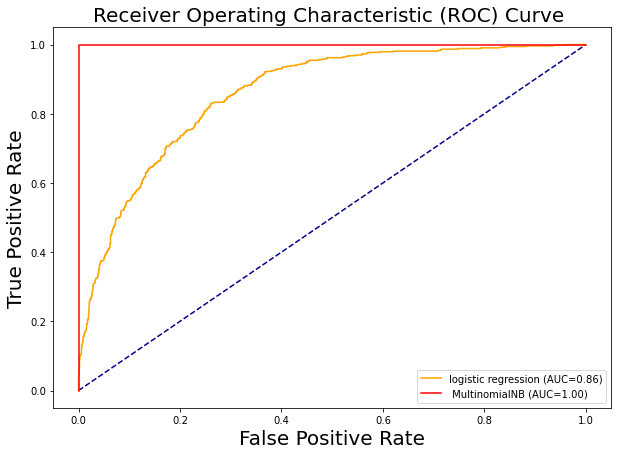

In [71]:
#plotting Roc 
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.plot(fpr1, tpr1,color="orange",label='logistic regression (AUC=%.2f)' %auc1 )
plt.plot(fprNB, tprNB,color="red",label=' MultinomialNB (AUC=%.2f)' %auc_NB)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristic (ROC) Curve ',fontsize=20)
plt.legend(loc='lower right')
plt.show();

- AUC for multinominal is 1.00 it's the best case , This's mean model predicts all ones as ones and zeros as zeros .
- it's the best scenario there's no overlap.

- True positive rate (or sensitivity or recall): TPR=TP/(TP+FN)
- False positive rate: FPR=FP/(FP+TN)
- True negative rate (or specificity): TNR=TN/(FP+TN)
- Precision = TP / (TP + FP)